# Lecture 7.4. Visualizing categorical data
Plotting when one of the main variables is categorical

Three main families of plots
- Categorical scatterplots:

    - stripplot() (with kind="strip"; the default)
    - swarmplot() (with kind="swarm")

- Categorical distribution plots:

    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    - boxenplot() (with kind="boxen")

- Categorical estimate plots:

    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")

## Categorical scatterplots

We'll use higher level interface: **catplot**

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


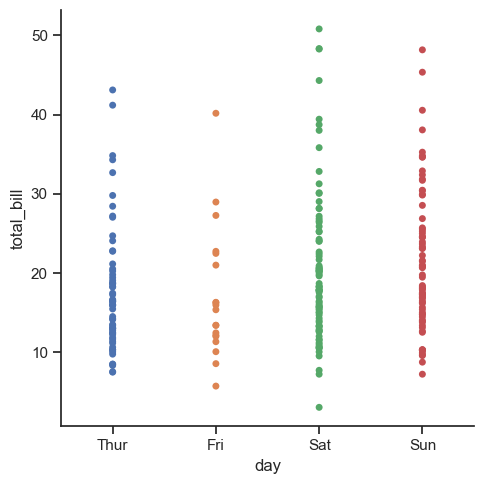

In [3]:
#The default representation of the data in catplot() uses a scatterplot.
# I had to add hue="day" to get different colors for each day
# Then, I set the legend to False 
# This was not necessary when I run this under WSL, the colors work by default
sns.catplot(x="day", y="total_bill", hue="day", legend=False, jitter=False, data=tips);

As you can see, all of the points belonging to one category  fall on the same position along the categorical variable axis.

stripplot(default kind of catplot), adjusts the positions of points on the categorical axis with a small amount of random “jitter”

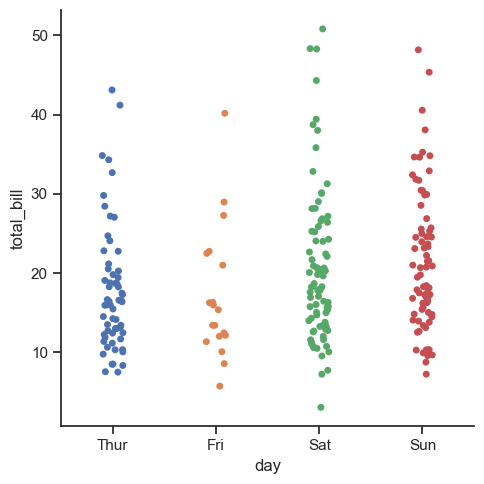

In [4]:

sns.catplot(x="day", y="total_bill", data=tips, hue="day", legend=False);


Another approach (swarmplot) adjusts the points along the categorical axis to avoid overlap.

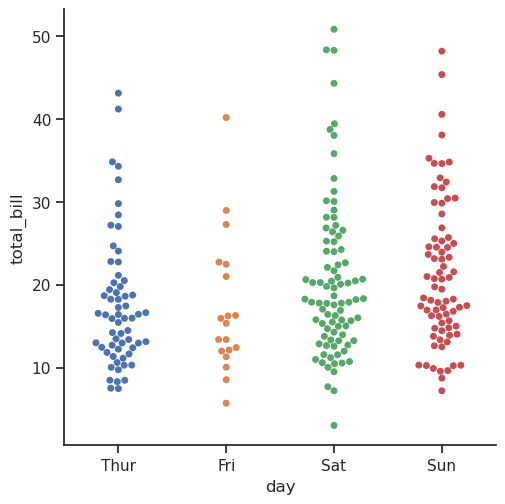

In [2]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

Again, we can plot more than two variables using **hue**.

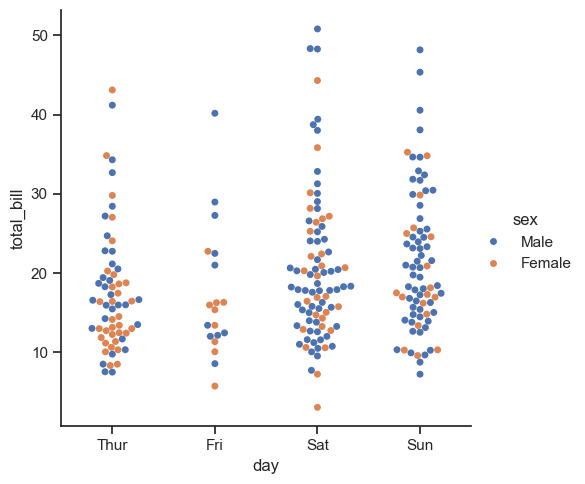

In [6]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

Scalar data has an inherent order defined by real line $\mathbb{R}$. For categorical data it is not very clear. Seaborn makes best guess but you can always control the order.



# categorical(discrete) variables
- **nominal variable**: has no intrinsic ordering to its categories like color
- **ordinal variable**: has a clear ordering like low high medium




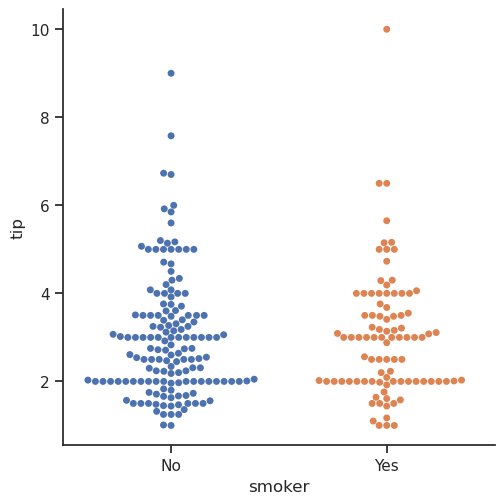

In [3]:
sns.catplot(x="smoker", y="tip",kind= 'swarm',  order=["No", "Yes"], data=tips);

If category names are relatively long or there are many categories, swap x and y

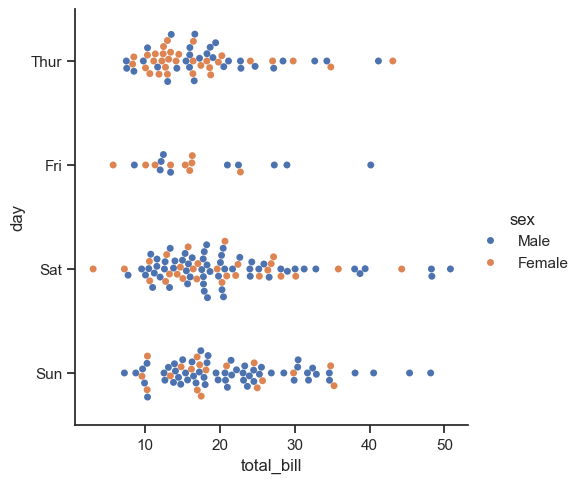

In [8]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="swarm", data=tips);

# Distributions of observations within categories

Scatter plots are limited in visualizing distribution of values when we have lots of datapoints.

One can visualize the summary of distribution in these scenarios.

# Box plot (well known graphical representation of a probability distribution)



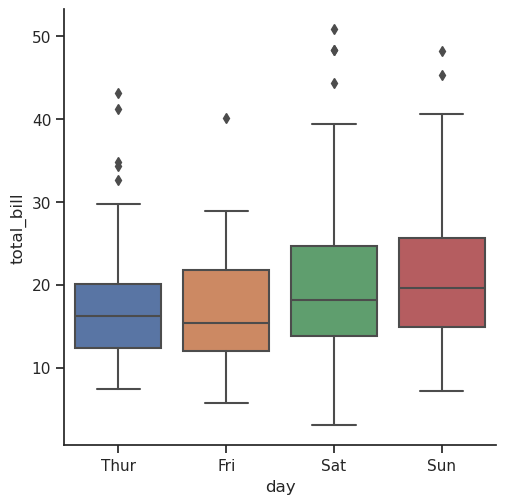

In [4]:
# Note: outlier as displayed as individual points
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

c:\Users\KOSEK\anaconda3\envs\tools1\Lib\site-packages\seaborn\categorical.py:2745: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


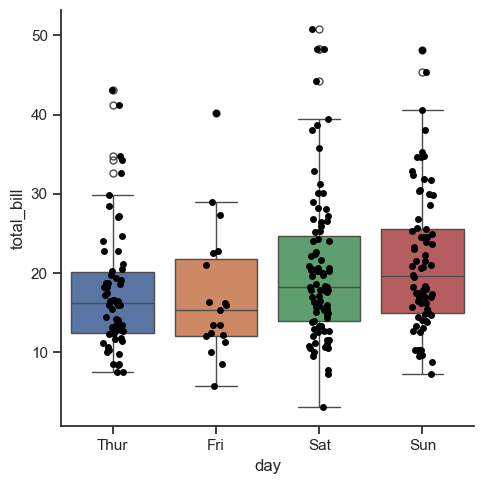

In [15]:
# Let's overlay points
g = sns.catplot(x="day", y="total_bill", kind="box", hue="day", legend=False, data=tips, ax= ax);

sns.stripplot(x="day", y="total_bill",color='black' , data=tips, ax=g.ax);

## Again we can play with *hue* semantics

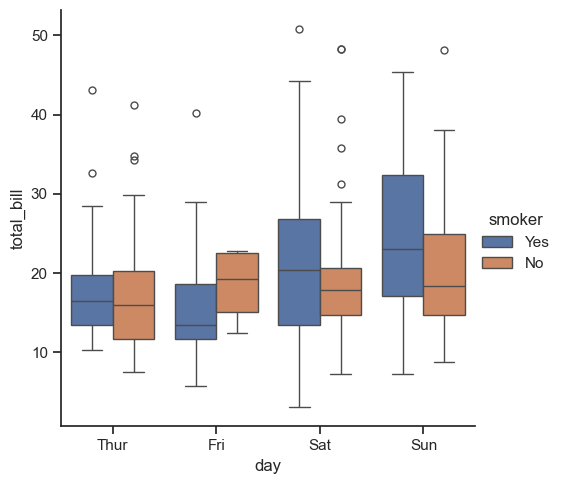

In [16]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

Above default behavior is called “dodging” and assumes that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging.

seaborn does its best if nesting is not possible.



   total_bill   tip     sex smoker  day    time  size  weekend
0       16.99  1.01  Female     No  Sun  Dinner     2     True
1       10.34  1.66    Male     No  Sun  Dinner     3     True
2       21.01  3.50    Male     No  Sun  Dinner     3     True
3       23.68  3.31    Male     No  Sun  Dinner     2     True
4       24.59  3.61  Female     No  Sun  Dinner     4     True


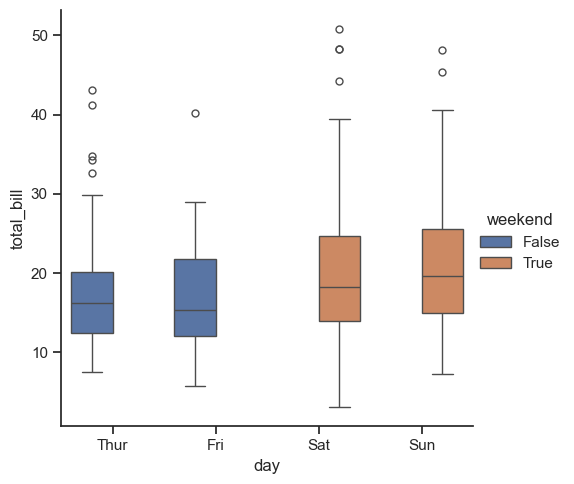

In [18]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
print(tips.head())
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=True, data=tips);

For large data set, we can better see the shape of the distribution using **boxen** plot

Here is the paper for more information

https://vita.had.co.nz/papers/letter-value-plot.html

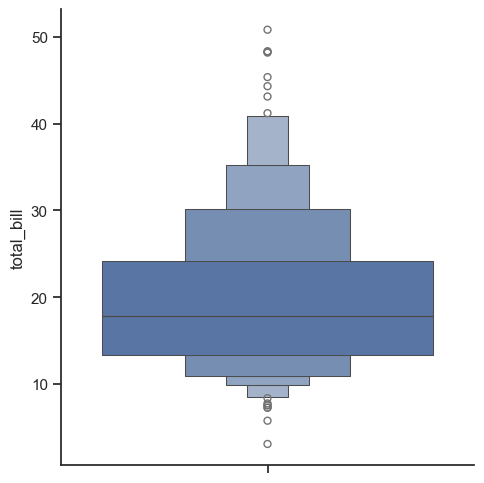

In [24]:
sns.catplot(y='total_bill', kind="boxen", data=tips)

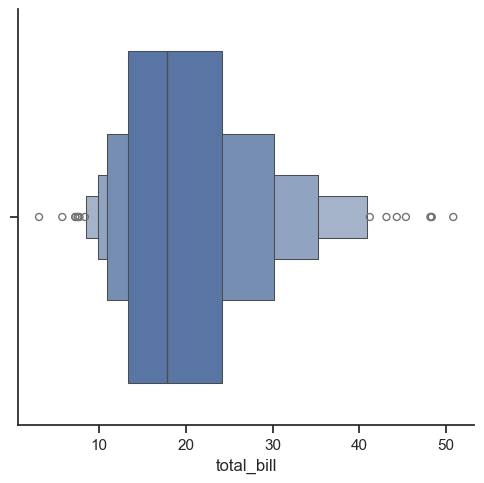

In [23]:
sns.catplot(x='total_bill', kind="boxen", data=tips)

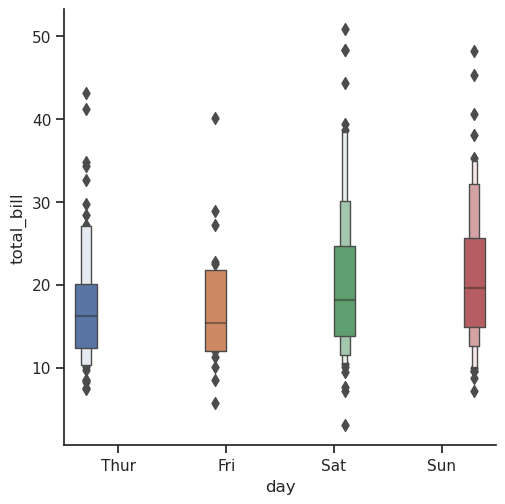

In [5]:
sns.catplot(x='day', y='total_bill', kind="boxen", data=tips, hue="day", legend=False)

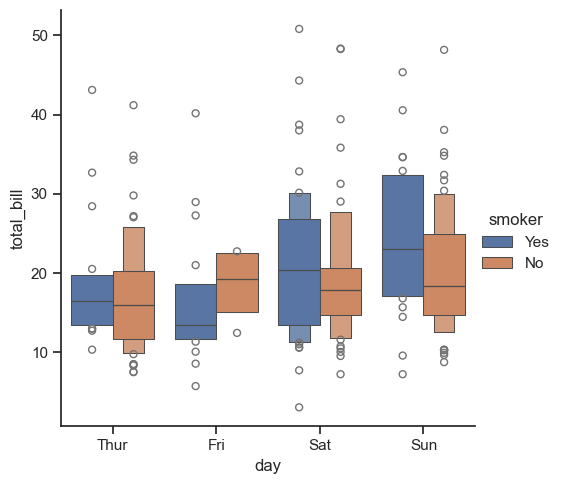

In [26]:
# try plot by smoker
sns.catplot(x='day', y='total_bill', kind="boxen", data=tips, hue="smoker")

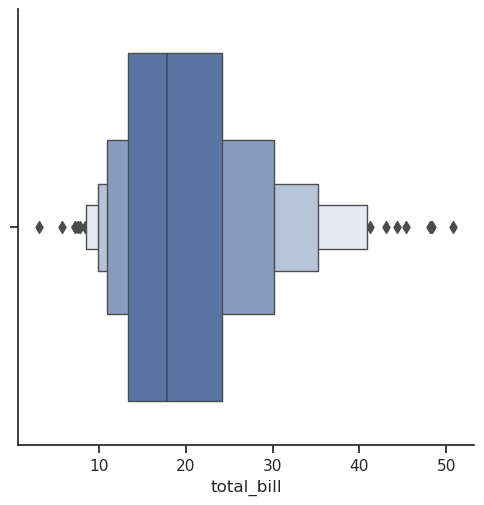

In [7]:
sns.catplot(x='total_bill', kind="boxen", data=tips)

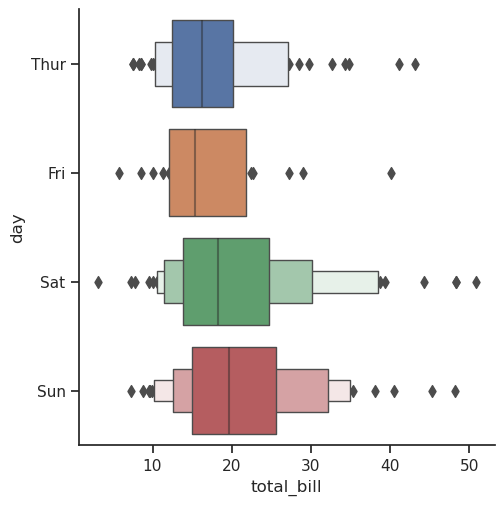

In [6]:
# try plot by smoker
sns.catplot(y='day', x='total_bill', kind="boxen", data=tips)

# Violinplots ( boxplot + kernel density estimation )

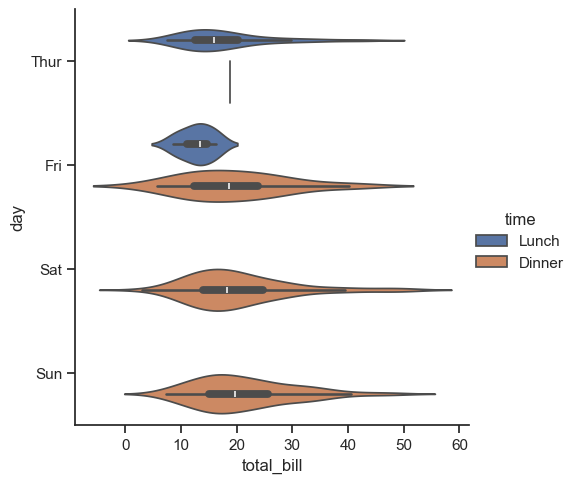

In [29]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips)

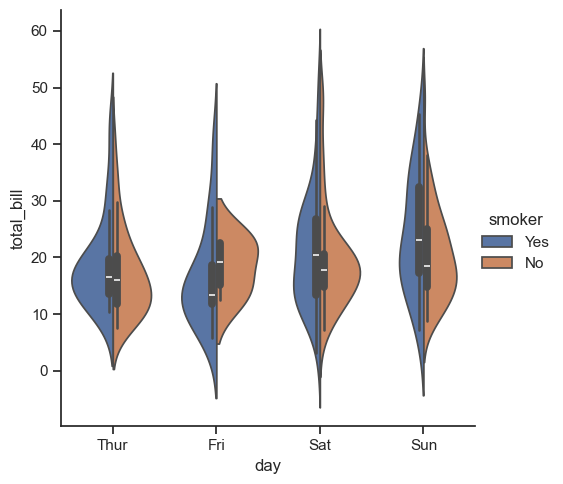

In [30]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips)

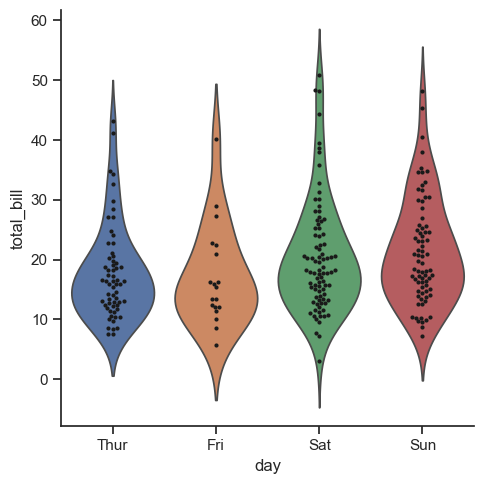

In [32]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, hue='day', legend=False,data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

# Statistical estimation (central tendency) within categories

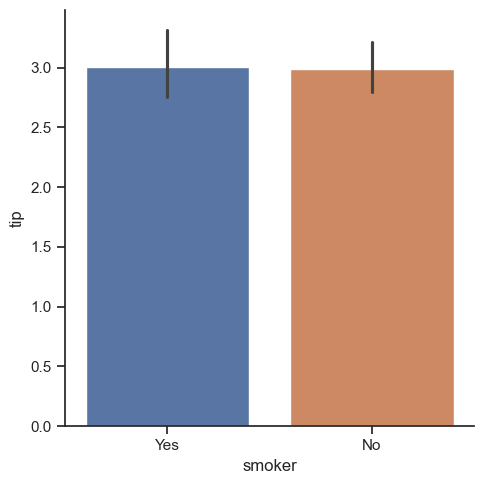

In [36]:
sns.catplot(x="smoker", y="tip", kind="bar", hue='smoker', legend=False, data=tips)

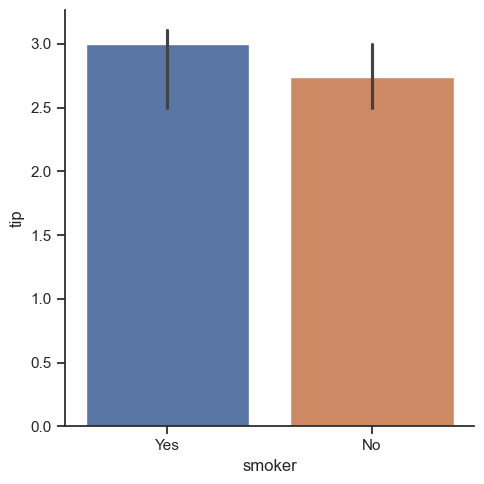

In [37]:
# from tips data set display bar plot of median tip for smoker(yes/no)
import numpy as np
sns.catplot(x="smoker", y="tip", kind="bar", estimator=np.median, hue='smoker', legend=False, data=tips)

In [38]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


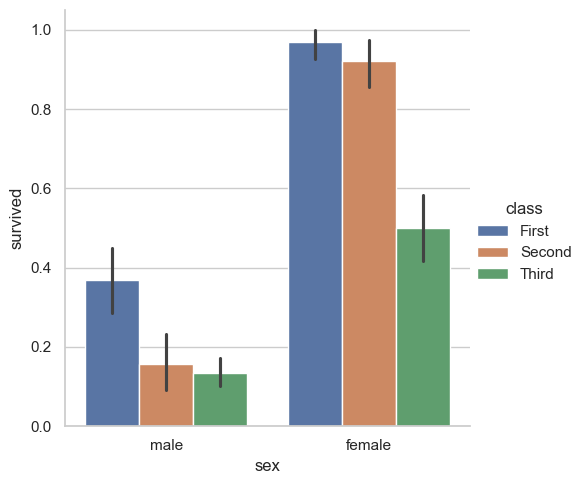

In [43]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

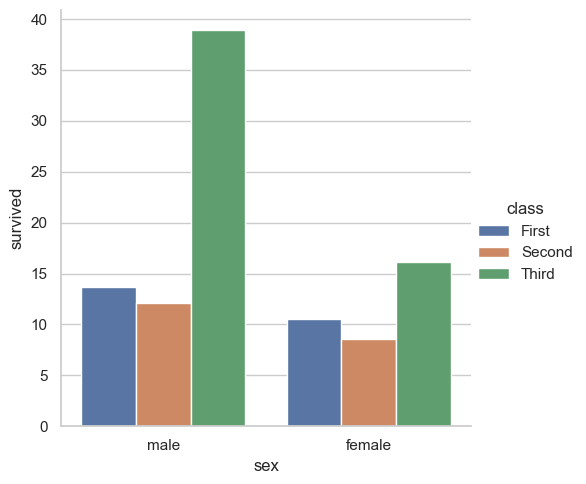

In [47]:
# can you display percentage survived
sns.catplot(x='sex', y='survived', hue='class', estimator=lambda x:(len(x)/len(titanic))*100, kind='bar', data=titanic)

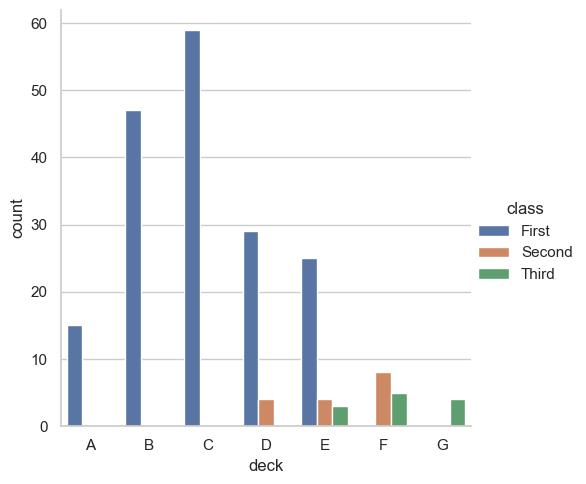

In [48]:
# display by class too
sns.catplot(x="deck", kind="count", hue='class',data=titanic)

# Point plot (same as bar plot but without bar)


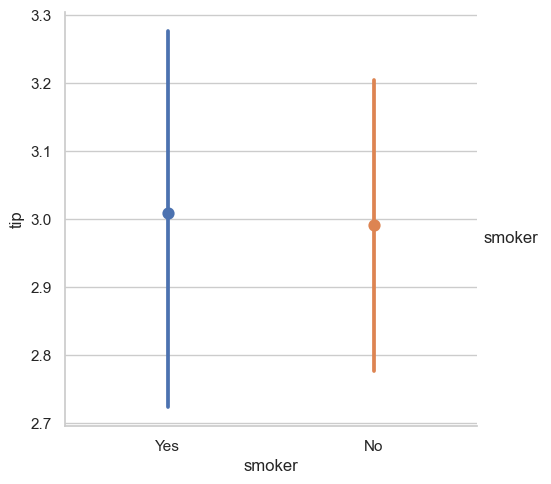

In [49]:
sns.catplot(x="smoker", y="tip", hue= "smoker",kind="point", data=tips)

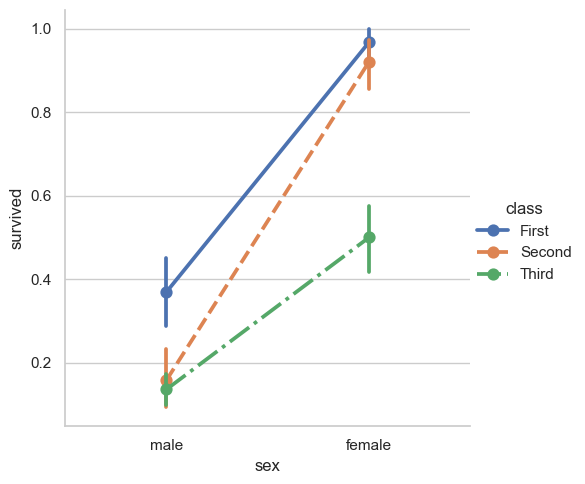

In [50]:
# For black and white compatibility
sns.catplot(x="sex", y="survived", hue="class", kind="point",linestyles=["-", "--", "-."], data=titanic);

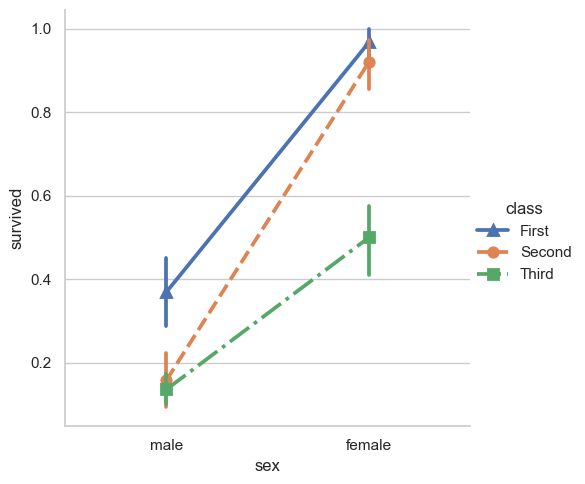

In [51]:
# need to add marker too
sns.catplot(x="sex", y="survived", hue="class", kind="point",markers=["^", "o", "s"],linestyles=["-", "--", "-."], data=titanic);

# multiple relationships with facets (grid or panel charts) 

In [52]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


c:\Users\KOSEK\anaconda3\envs\tools1\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


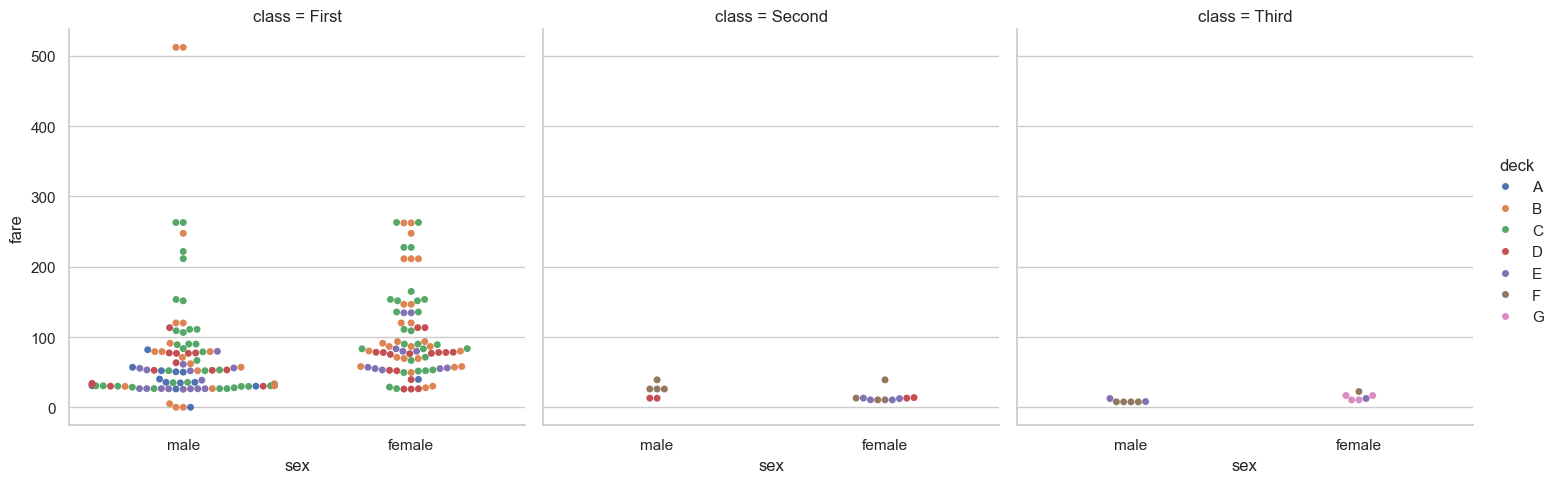

In [53]:
sns.catplot(x="sex", y="fare", hue="deck",
            col="class",
            kind="swarm", data=titanic);

# Visualizing the distribution 

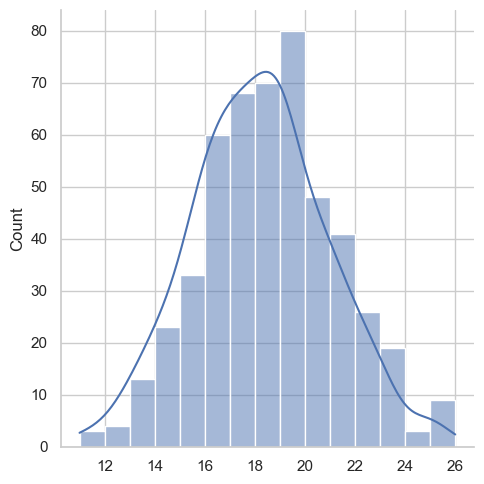

In [57]:
# We use a different syntax as distplot will soon be deprecated
import numpy as np
x = np.random.binomial(30, .6, size = 500)
sns.displot(x, kde=True)

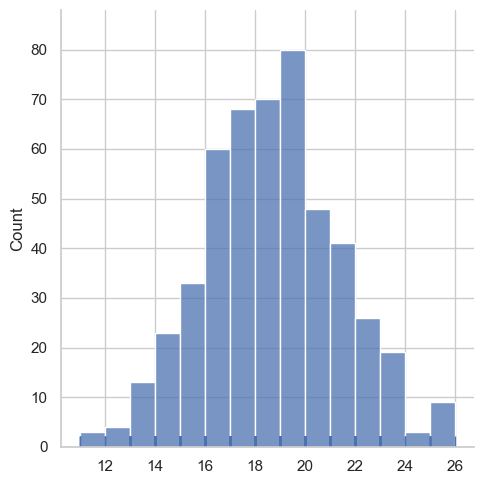

In [60]:
sns.displot(x, rug=True)

# KDE 

<Axes: ylabel='Density'>

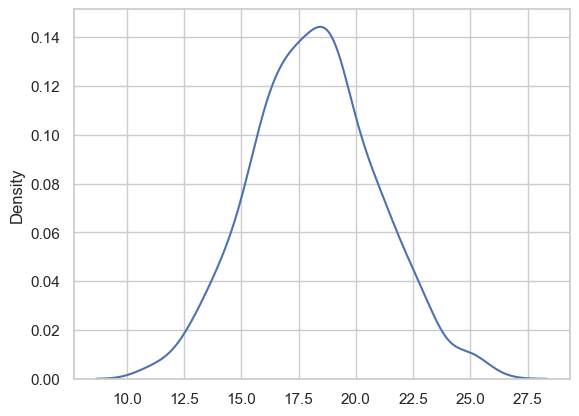

In [69]:
sns.kdeplot(x)

In [70]:
from scipy.stats import expon

C:\Users\KOSEK\AppData\Local\Temp\ipykernel_29600\1330767752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, fit=expon )


<Axes: >

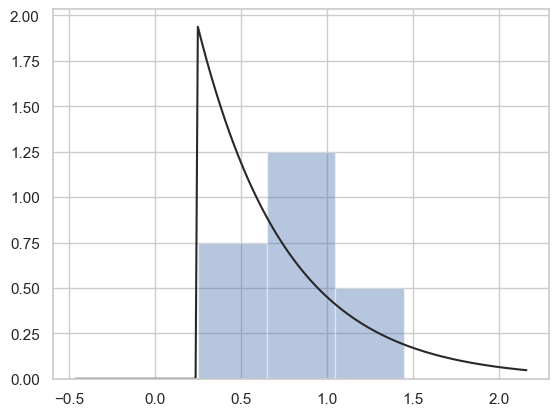

In [76]:
# The fit option has not been replaced in the histplot after distplot is deprecated
x= np.random.exponential(size = 10)
sns.distplot(x, kde=False, fit=expon )

# Visualizing distribution of two variables

In [77]:
from scipy.stats import multivariate_normal

In [78]:
rv = multivariate_normal([1, 1], 1)

In [79]:
import pandas as pd
x2d= rv.rvs(size=100, random_state=1)
df = pd.DataFrame(x2d, columns=["x1", "x2"])


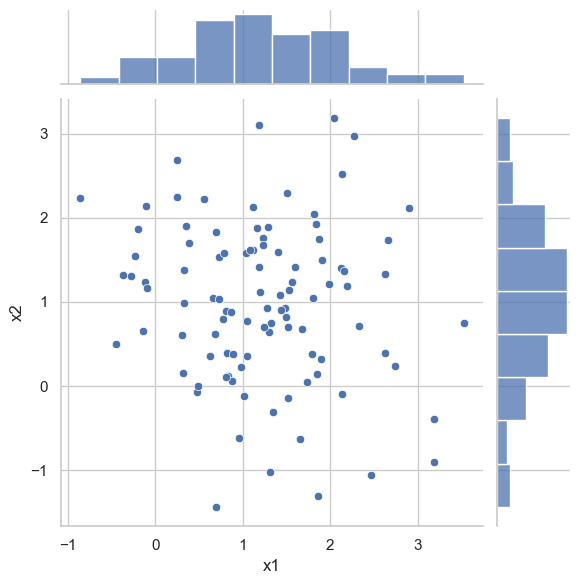

In [80]:
# try changing default from scatter to hex, kde
sns.jointplot(x="x1", y="x2", data=df);

# Pairwise relationships

In [81]:
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


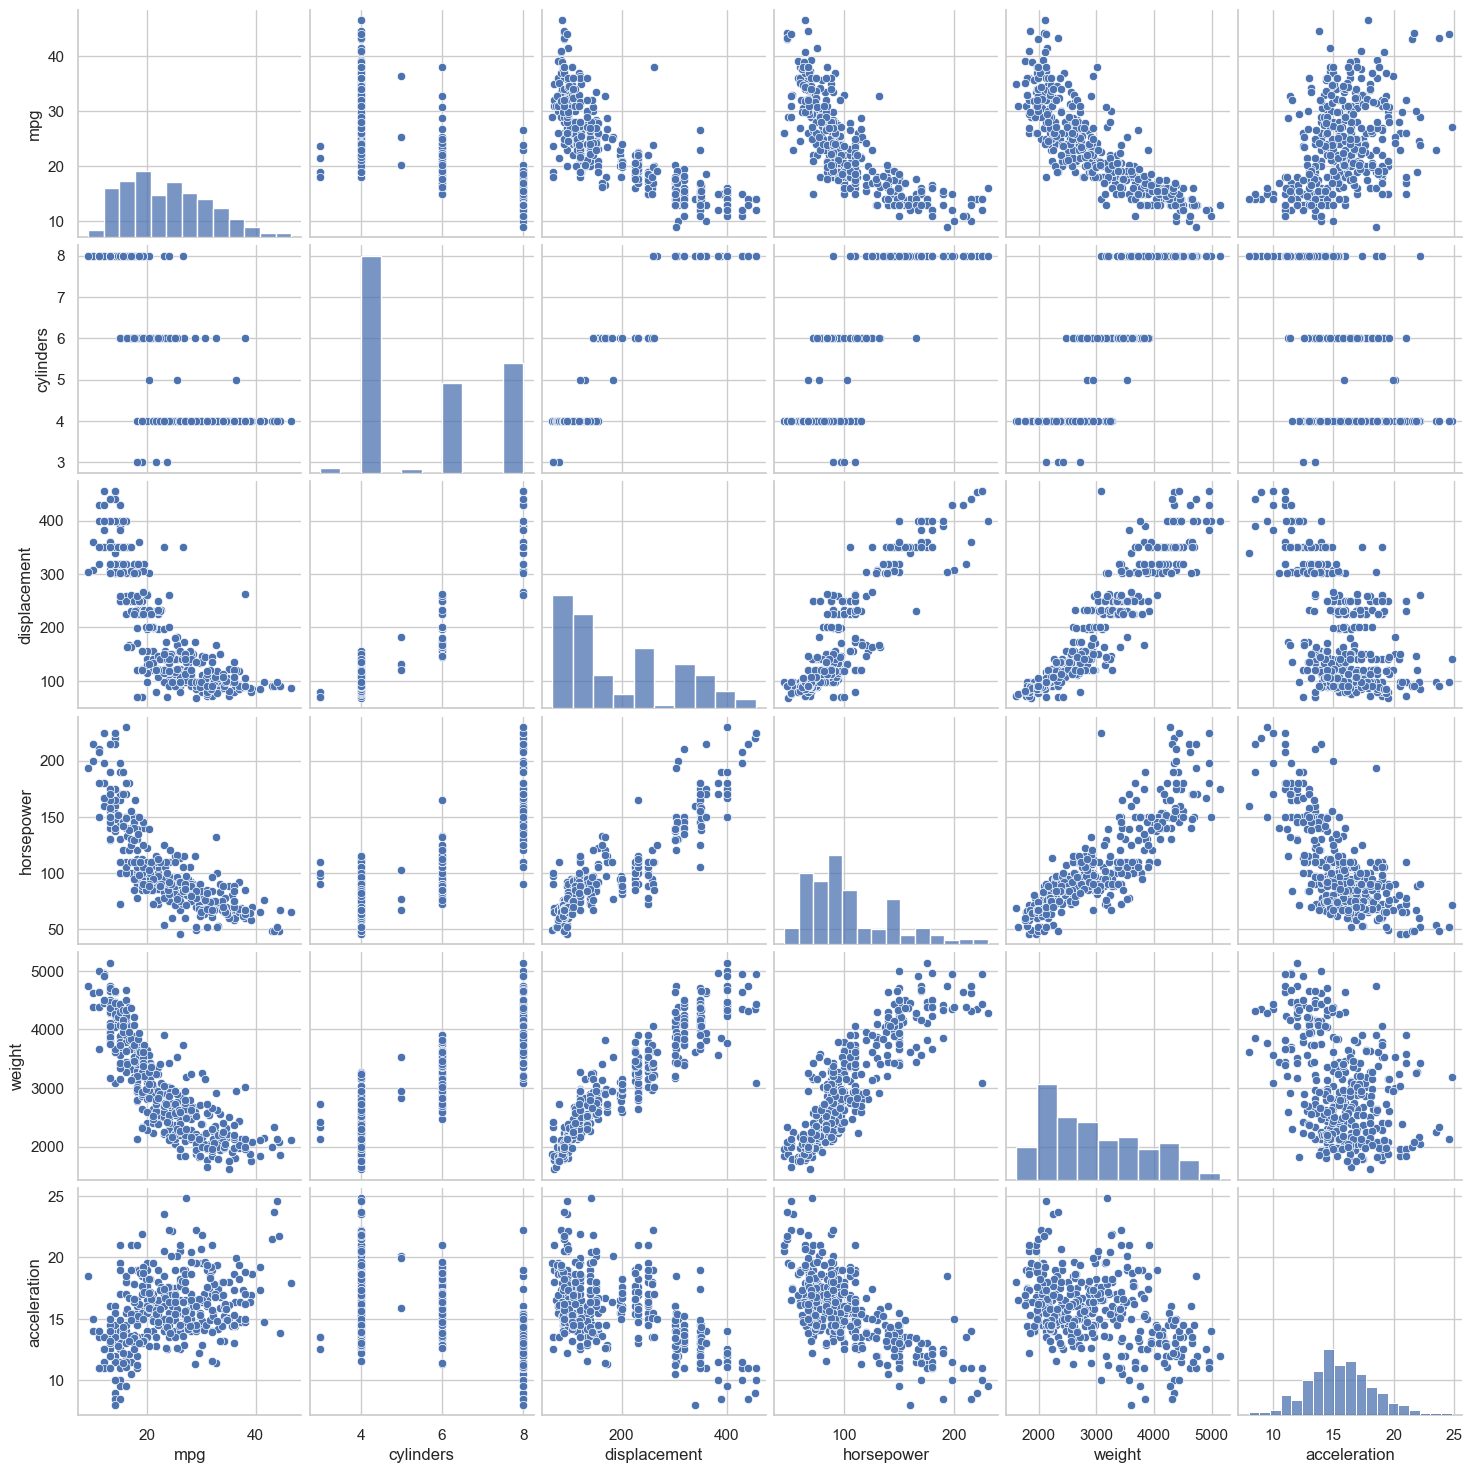

In [82]:
# try chaning diag plot to kde
joint_grid_inst= sns.pairplot(df_mpg.iloc[:, 0:-3])

In [84]:
# pairplot is build on top of PariGrid object
type(joint_grid_inst)

seaborn.axisgrid.PairGrid

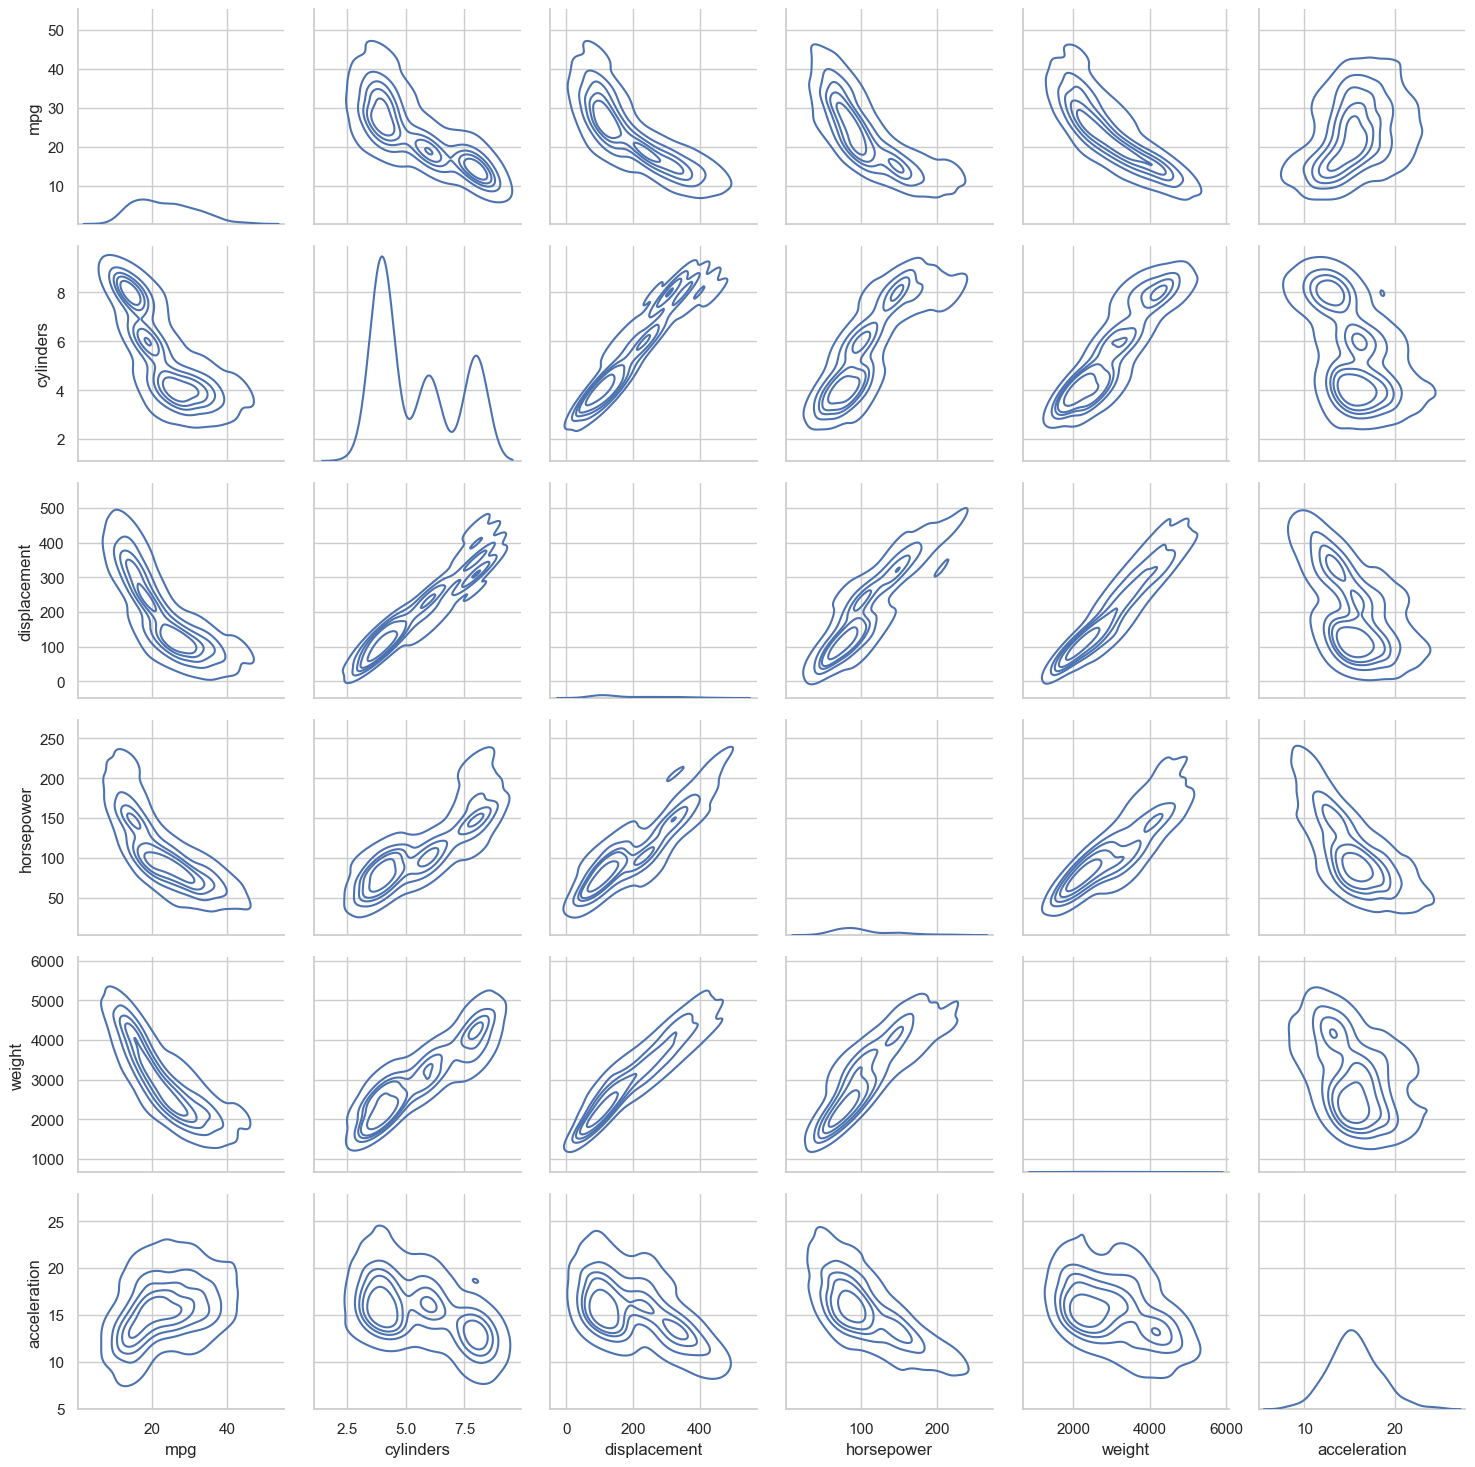

In [85]:
g = sns.PairGrid(df_mpg.iloc[:, 0:-3].dropna())
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# Realtionship (linear) among variables

In [86]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='petal_length'>

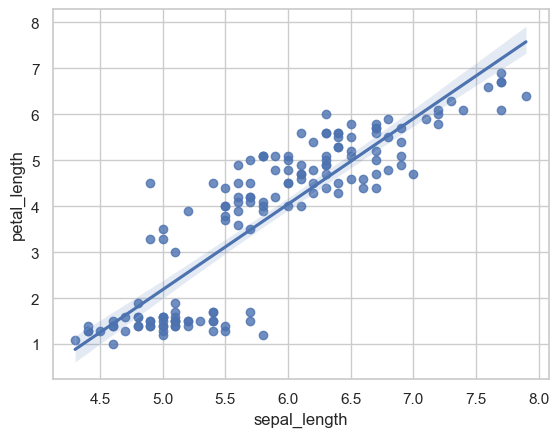

In [87]:
sns.regplot(x="sepal_length", y="petal_length", data=iris_df)

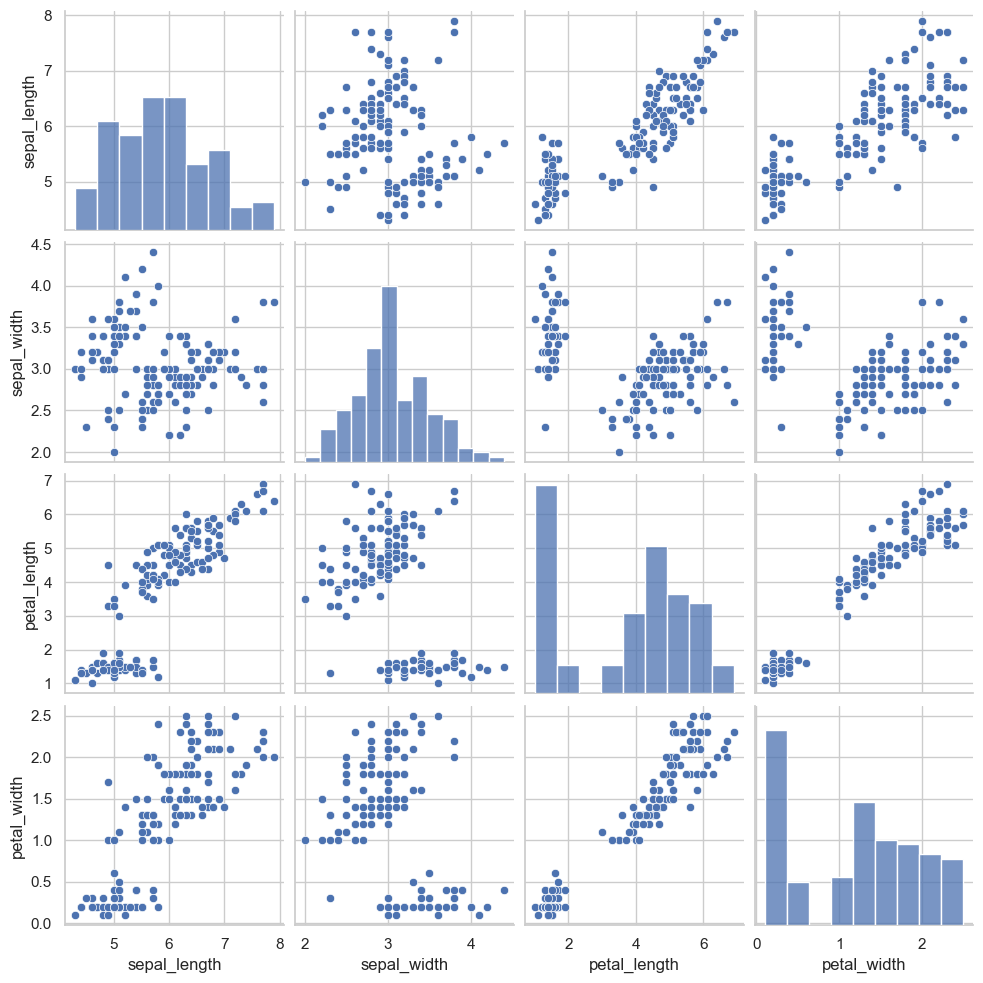

In [88]:
sns.pairplot(iris_df,)

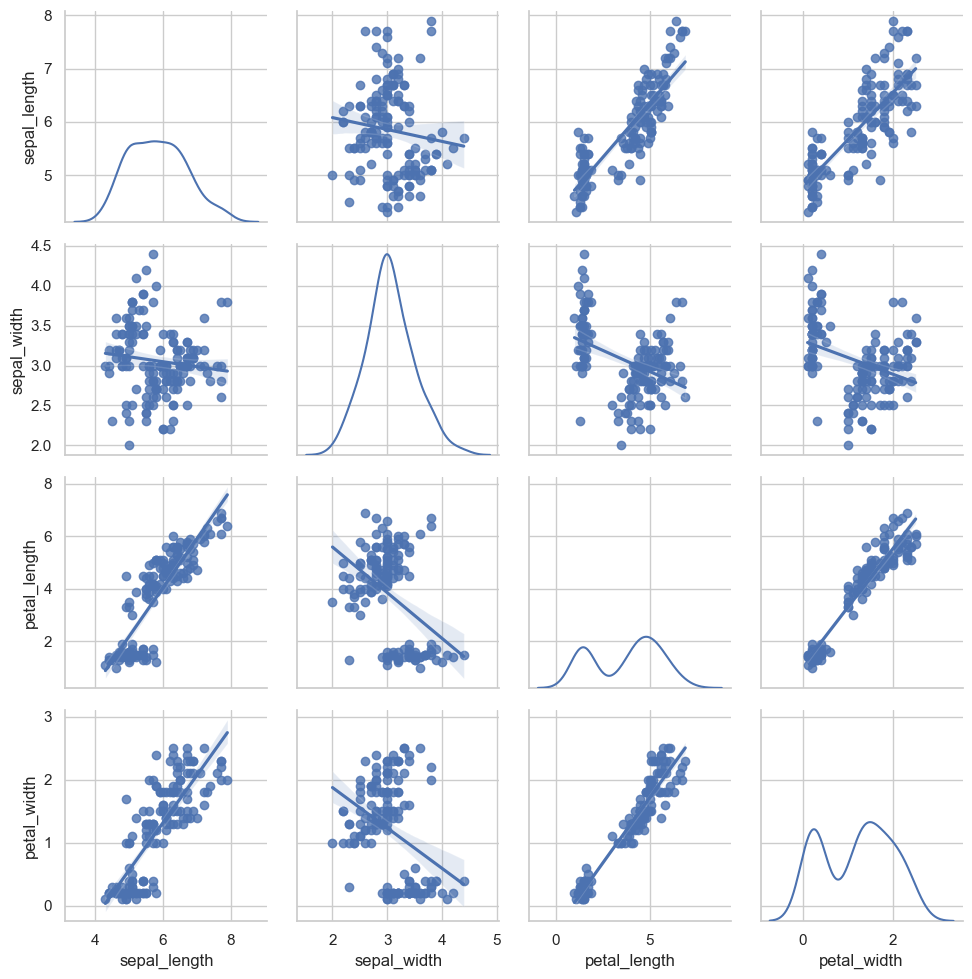

In [89]:
# create a PariGrid and map kdeplot on diagonal and regression of diaglonal
g = sns.PairGrid(iris_df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot)

# Heatmap

In [97]:
#this does not work because "species" is not numerical
iris_df.head()
#sns.heatmap(iris_df.corr(),annot=True, fmt=".2f")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

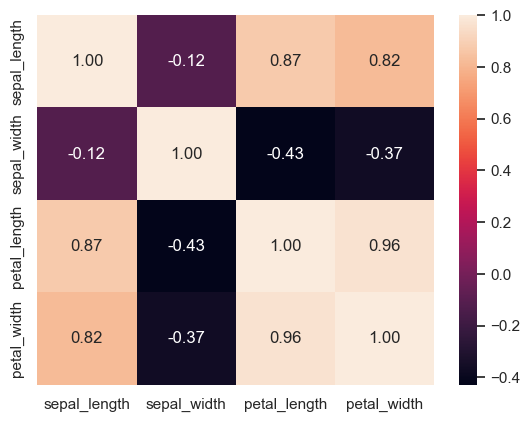

In [96]:
sns.heatmap(iris_df.drop('species', axis=1).corr(),annot=True, fmt=".2f")


# Geo map
## [Folium](https://python-visualization.github.io/folium/). It uses Leaflet - a JavaScript library for interactive maps

We are only scratching the surface. It is a bit more involved subject.

In [9]:
!pip install folium

     |████████████████████████████████| 97 kB 1.7 MB/s            
     |████████████████████████████████| 56 kB 3.7 MB/s             
     |████████████████████████████████| 133 kB 16.2 MB/s            
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.2
    Uninstalling Jinja2-2.11.2:
      Successfully uninstalled Jinja2-2.11.2
You should consider upgrading via the '/home/wkossek/anaconda3/bin/python -m pip install --upgrade pip' command.


In [10]:
import folium
m = folium.Map(location=[39.6766, -104.9619])
m

# One can  choose different tiles

# The 'Stamen Toner' does not work on my system. The first two work just fine.
For a list of more click here:
https://leaflet-extras.github.io/leaflet-providers/preview/

In [13]:
folium.Map(
    location=[39.675938, -104.960721],
    #tiles ='OpenStreetMap',
    tiles ='Cartodb Positron',
    #tiles='Stamen Toner',
    zoom_start=13
)

# Markers

In [14]:
# Things got a bit complicated 
# see https://python-visualization.github.io/folium/latest/user_guide/raster_layers/tiles.html
# for more information
m = folium.Map(
    location=[40.211209, -105.821088],
    zoom_start=11,
    tiles = 'OpenStreetMap',
    #tiles='stamenterrain',
    #attr="Streem Terrain"
    #tiles='Stamen Toner',
    #attr='<a href="https://stadiamaps.com/" target="_blank">Stadia Maps</a>'
)

tooltip = 'Click me!'

folium.Marker([40.249466, -105.827617], popup='<i>Grand lake</i>', tooltip=tooltip).add_to(m)
folium.Marker([40.144075, -105.844817], popup='<b>LAke Granby</b>', tooltip=tooltip).add_to(m)

m

In [15]:


m = folium.Map(
    location=[-0.760488, -90.331771],
    zoom_start=14,
)

folium.Circle(
    radius=100,
    location=[-0.760488, -90.331771],
    popup='Tortuga bay',
    color='crimson',
    fill=False,
).add_to(m)
m

In [16]:
# long latitude pop up
m = folium.Map(
    location=[-0.307781, -90.691985],
    zoom_start=8,
    #tiles='Stamen Terrain'
)
m.add_child(folium.LatLngPopup())


m


JeoJson support

http://geojson.org/


In [17]:
!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/antarctic_ice_edge.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  314k  100  314k    0     0  1153k      0 --:--:-- --:--:-- --:--:-- 1153k


In [18]:
!head -n 10 antarctic_ice_edge.json

{
"type": "FeatureCollection",
"features": [
{ "type": "Feature", "properties": { "scalerank": 5, "featurecla": "Antarctic Ice Shelf Edge" }, "geometry": { "type": "LineString", "coordinates": [ [ 56.688664178296278, -66.860414727647708 ], [ 56.676055128816984, -66.844446710069576 ], [ 56.644119093660606, -66.796335951605784 ], [ 56.682876417879584, -66.783158461371414 ], [ 56.769072706942382, -66.768223972439046 ], [ 56.807830031161359, -66.746209812282643 ], [ 56.800905389234174, -66.741558933376382 ], [ 56.782508579338298, -66.713240248480474 ] ] } }
,
{ "type": "Feature", "properties": { "scalerank": 5, "featurecla": "Antarctic Ice Shelf Edge" }, "geometry": { "type": "LineString", "coordinates": [ [ 76.839888950512204, -69.283057549923001 ], [ 76.84071577342894, -69.282799167761567 ], [ 76.804128859366358, -69.25783945096461 ], [ 76.776533644522431, -69.249054457474983 ], [ 76.751212192699427, -69.248899428178106 ], [ 76.697468703115874, -69.262180271277145 ], [ 76.703359816397096

In [19]:
!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/antarctic_ice_shelf_topo.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  157k  100  157k    0     0   229k      0 --:--:-- --:--:-- --:--:--  229k


In [20]:
!head antarctic_ice_shelf_topo.json

{"type":"Topology","transform":{"scale":[0.036003599298640235,0.0020699335558555815],"translate":[-179.99998938710374,-85.22210242610454]},"objects":{"antarctic_ice_shelf":{"type":"GeometryCollection","geometries":[{"type":"Polygon","arcs":[[0],[1],[2],[3],[4],[5],[6],[7],[8]]},{"type":"Polygon","arcs":[[9]]},{"type":"Polygon","arcs":[[10]]},{"type":"Polygon","arcs":[[11]]},{"type":"Polygon","arcs":[[12]]},{"type":"Polygon","arcs":[[13]]},{"type":"Polygon","arcs":[[14]]},{"type":"Polygon","arcs":[[15]]},{"type":"Polygon","arcs":[[16]]},{"type":"Polygon","arcs":[[17]]},{"type":"Polygon","arcs":[[18]]},{"type":"Polygon","arcs":[[19]]},{"type":"Polygon","arcs":[[20]]},{"type":"Polygon","arcs":[[21]]},{"type":"Polygon","arcs":[[22]]},{"type":"Polygon","arcs":[[23]]},{"type":"Polygon","arcs":[[24]]},{"type":"Polygon","arcs":[[25]]},{"type":"Polygon","arcs":[[26]]},{"type":"Polygon","arcs":[[27]]},{"type":"Polygon","arcs":[[28]]},{"type":"Polygon","arcs":[[29],[30]]},{"type":"MultiPolygon","

In [22]:

antarctic_ice_edge = 'antarctic_ice_edge.json'
antarctic_ice_shelf_topo = 'antarctic_ice_shelf_topo.json'

m = folium.Map(
    location=[-59.1759, -11.6016],
    #tiles='Mapbox Bright',
    zoom_start=2
)

folium.GeoJson(
    antarctic_ice_edge,
    name='geojson'
).add_to(m)

folium.TopoJson(
    open(antarctic_ice_shelf_topo),
    'objects.antarctic_ice_shelf',
    name='topojson'
).add_to(m)

folium.LayerControl().add_to(m)


m

# Choropleth maps

Visualizing a quantity(population density or per-capita income.) using map

In [23]:
!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   367  100   367    0     0   2085      0 --:--:-- --:--:-- --:--:--  2085


In [24]:
!head -n 10 US_Unemployment_Oct2012.csv

State,Unemployment
AL,7.1
AK,6.8
AZ,8.1
AR,7.2
CA,10.1
CO,7.7
CT,8.4
DE,7.1
FL,8.2


In [25]:
!curl -O https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87688  100 87688    0     0   439k      0 --:--:-- --:--:-- --:--:--  439k


In [26]:
!head -n 10 us-states.json

{"type":"FeatureCollection","features":[
{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},
{"type":"Feature","id":"AK","properties":{"name":"Alaska"},"geometry":{"type":"MultiPolygon","coord

In [27]:
import pandas as pd

state_geo = 'us-states.json'

state_unemployment = 'US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

# Resources
Look at this gallery

 https://residentmario.github.io/geoplot/gallery.html
 
## Geoplot and geopandas
- https://github.com/ResidentMario/geoplot
- http://geopandas.org/gallery/plotting_with_geoplot.html